In [2]:
%load_ext autoreload
%autoreload 1
%aimport general_functions,plotting_functions, hamiltonians

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hamiltonians import hamiltonian_2QD_1HH_Lowest
from plotting_functions import modify_plot, save_figure

In [4]:
hbar = 6.582 * 10 ** (-1)  # Hbar (ueV*ns)
g = 1.35  # g-factor fo the GaAs
muB = 57.883  # Bohr magneton (ueV/T)
B = 0.015  # Magnetic field applied (T)
ET = g * muB * B  # Zeeman spliting (ueV)
u = 2000  # Intradot interaction (ueV)

In [5]:
limit_eps=4
eps_vector = np.linspace(-limit_eps, limit_eps, 10**4) * ET - u

min_tau=0.1
max_tau=2
tau=np.linspace(min_tau,max_tau,10**2)
l2=tau*0.4
l1=l2/100

hypermatrix=np.zeros([10**4,10**2,3,3],dtype=complex)

for i in range (0,10**4):
    for j in range (0,10**2):
        parameters=[eps_vector[i], u, ET, tau[j], l1[j],l2[j]]
        hypermatrix[i,j]=hamiltonian_2QD_1HH_Lowest(*parameters)

In [6]:
eigensystem = np.linalg.eigh(hypermatrix)  # Compute the eigen system of the given matrix

In [7]:
population_middle=np.abs(eigensystem[1][:,:,2,:])**2

Do you want to overwrite the file (D:\OneDrive - Universidad Autonoma de Madrid\Universidad\Master\TFM\Notes\LaTeX\images\occupation_middle_state.eps)?  [y]/n: n


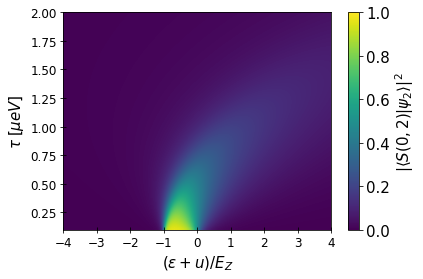

In [10]:
# fig, (ax1, ax2, ax3) = plt.subplots(figsize=(30, 5), ncols=3)
# axis=[ax1,ax2,ax3]
for i in range (1,2):
    # ax=axis[i]
    fig, ax = plt.subplots()
    pos=ax.imshow(population_middle[:,:,i].transpose(),aspect='auto',interpolation='spline36',origin='lower',
               extent=[-limit_eps,limit_eps,min_tau,max_tau], vmax=1, vmin=0)
    ax.set_xlabel(r'$(\varepsilon+u)/E_Z$')
    ax.set_ylabel(r'$\tau \; [\mu eV]$')
    cbar=fig.colorbar(pos, ax=ax,)
    cbar.set_label(r'$|\langle S(0,2)|\psi_'+str(i+1)+r'\rangle|^2$', fontsize=15)
    cbar.ax.tick_params(labelsize=15) 
    
    modify_plot(ax, tick_direction='inout', x_ticks_vector=np.arange(-limit_eps,limit_eps+1), label_size=15, tick_label_size=12)
    save_figure(fig,'occupation_middle_state')